# 使用 DNN 完成房價預測 (Regression)

In [3]:
import tensorflow
from tensorflow import keras
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tensorflow.__version__)

2.1.0


## Load boston housing dataset

The meaning of each column is as follows (每個欄位的意思如下)：

- CRIM: per capita crime rate by town (人均犯罪率)
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (規劃住宅用地超過 25000 平方英尺的比例)
- INDUS: proportion of non-retail business acres per town (非零售業的比例)
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (查爾斯河虛擬變數) (=1 代表大片土地，否則為 0)
- NOX: nitric oxides concentration (parts per 10 million) (氮的氧化物濃度(1000萬分之一))
- RM: average number of rooms per dwelling (平均每人所住房間數)
- AGE: proportion of owner-occupied units built prior to 1940  (1940 年前自用住宅比例)
- DIS: weighted distances to five Boston employment centres (到達 5 個波士頓就業中心的加權距離)
- RAD: index of accessibility to radial highways (到達 radial highways 的系數)
- PTRATIO: pupil-teacher ratio by town (城填師資比例)
- TAX: full-value property-tax rate per $10,000 (每 10,000 元的產權稅率)

- B:1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (城填中黑人的比例)
- LSTAT    % lower status of the population (低端人口的比例)
- MEDV     Median value of owner-occupied homes in $1000's (自用住宅價格的中位數 (1000美元))

In [4]:
df = pd.read_csv('bostonhousing.csv')
df.head(8)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


## Split $x$ and $y$

In [5]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [6]:
x = df.drop(columns=['medv'])
y = df.medv
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## Split training and testing sets

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

## Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Construct the NN model

In [8]:
# x_train contains 13 features
x_train.shape

(337, 13)

In [17]:
model = keras.models.Sequential()
#first input layer
model.add(keras.layers.Dense(64, input_dim=13, activation='relu'))
#亦可寫為
#model.add(keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
#second hidden layer
model.add(keras.layers.Dense(64, activation='relu'))
#output layer， no activation function
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [22]:
# loss function is mse (mean squared error)
# metrics is mae (mean absolute error) and mse
model.compile(loss='mse', optimizer='sgd', metrics=['mse','mae'
                                                   ])

In [23]:
history = model.fit(x_train, y_train, epochs=100, verbose=0)

In [26]:
dfResult = pd.DataFrame(history.history)
dfResult.head()

,loss,mse,mae
0,1.861908,1.861908,1.013686
1,2.714009,2.714009,1.245991
2,2.112988,2.112988,1.073152
3,2.024974,2.024974,1.056435
4,1.818589,1.818589,0.996725


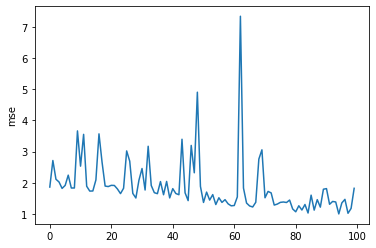

In [28]:
sns.lineplot(x=range(100), y=dfResult.mse)

In [31]:
print(f'The minimum value of the mse during the training is {dfResult.mse.min():.2f}')

The minimum value of the mse during the training is 1.00


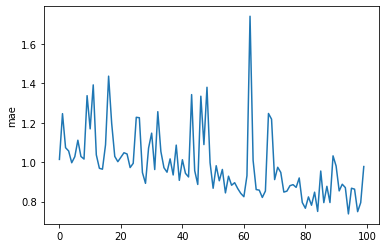

In [29]:
sns.lineplot(x=range(100), y=dfResult.mae)

In [25]:
eloss,emse, emae = model.evaluate(x_test, y_test)
print(f'Loss on the testing set is: {eloss}')
print(f'MSE on the testing set is:{emse}')
print(f'MAE on the testing set is:{emae}')

169/169 [==============================] - 0s 71us/sample - loss: 13.0334 - mse: 13.0334 - mae: 2.4683
Loss on the testing set is: 13.033369106653879
MSE on the testing set is:13.033369064331055
MAE on the testing set is:2.468275785446167


In [34]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2s = r2_score(y_test, y_pred)
print(f"DNN regression：the R squared value on the testing set is {r2s}")



DNN regression：the R squared value on the testing set is 0.8365614817321727
